In [2]:
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 14, 'figure.figsize': [12.0, 6.0]})

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) # стаж
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
X.shape

(2, 10)

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

1. Подберите скорость обучения (alpha) и количество итераций: 

In [5]:
n = X.shape[1]
alpha = 1e-3
w = np.array([1, 0.5])
errors = []

for i in range(int(4801)):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    errors.append(err)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 400 == 0:
        print(i, w, err)

0 [1.1102 0.84  ] 3173.15
400 [18.17511588  9.27626113] 500.7989288428639
800 [28.06626432  7.44984037] 243.83236130353217
1200 [34.59041507  6.24510603] 132.03487746741158
1600 [38.89371573  5.45046864] 83.39556413536022
2000 [41.73215361  4.92632937] 62.2342399245102
2400 [43.60437454  4.58060946] 53.027661712772876
2800 [44.8392831   4.35257415] 49.02219014944904
3200 [45.65382326  4.20216307] 47.27954461105105
3600 [46.19109031  4.1029526 ] 46.52137833162843
4000 [46.54546925  4.03751382] 46.19152576288303
4400 [46.77921602  3.99435069] 46.048018038969396
4800 [46.93339434  3.96588049] 45.985582670037175


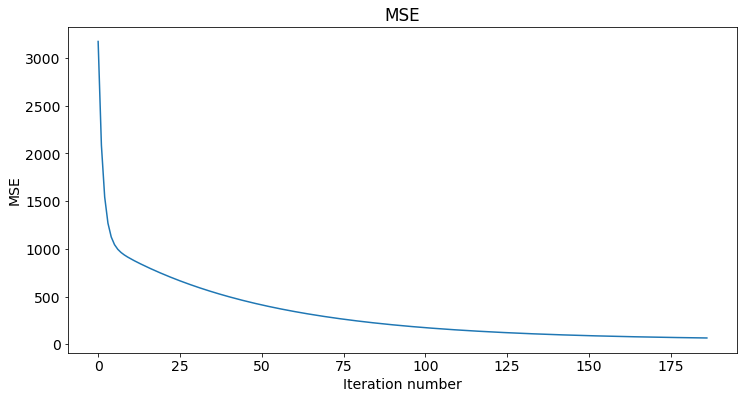

In [9]:
def build_mse_plot(errors_list):
    plt.plot(range(len(errors_list)), errors_list)
    plt.title('MSE')
    plt.xlabel('Iteration number')
    plt.ylabel('MSE');
build_mse_plot(errors)

 2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [12]:
w = np.array([1, 0.5])
alpha = 1e-2

for i in range(501):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    if i % 100 == 0:
        print(i, w, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538


3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога

In [26]:
w = np.array([1, 0.5])
min_mse = 44
err = np.inf
i = 0
max_iter = 1000
errors = list()

while True:
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    if err < min_mse or i > max_iter:
        break
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    errors.append(err)
    i += 1

print(errors[-1:])

[45.937500872219864]
